In [2]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

# Data

In [3]:
base_name='../experiments/egemaps/random_forest/default/'

In [178]:
importance=glob.glob(base_name+'/*/results/data/*/importance.csv')
performance=glob.glob(base_name+'/*/results/data/*/performance.csv')
relevant_features=glob.glob(base_name+'/*/results/data/*/relevant_features.csv')

In [179]:
import warnings

DF_importance=pd.DataFrame({})
DF_performance=pd.DataFrame({})
DF_relevant_features=pd.DataFrame({}) 
warnings.filterwarnings('ignore')
for (i,j,k) in zip(importance,performance,relevant_features):
     
    audio_type=i.split('/')[-2].split('-')[0]
    experiment=i.split('/')[-2].split('-')[1] 
    
    df_importance=pd.read_csv(i)
    df_importance.loc[:,'audio_type']=audio_type
    df_importance.loc[:,'experiment']=experiment
    DF_importance=DF_importance.append(df_importance)

    df_performance=pd.read_csv(j)
    df_performance.loc[:,'audio_type']=audio_type
    df_performance.loc[:,'experiment']=experiment
    DF_performance=DF_performance.append(df_performance)

    df_relevant_features=pd.read_csv(k)
    df_relevant_features.loc[:,'audio_type']=audio_type
    df_relevant_features.loc[:,'experiment']=experiment
    DF_relevant_features=DF_relevant_features.append(df_relevant_features)

In [183]:
DF_importance.to_csv('../global_results/egemaps_random_forest_default_importance.csv')
DF_performance.to_csv('../global_results/egemaps_random_forest_default_performance.csv')
DF_relevant_features.to_csv('../global_results/egemaps_random_forest_default_relevant_features.csv')

# Performance

In [7]:
DF_performance

,index,all,O,C,E,A,N,audio_type,experiment
0,r2,0.092665,0.121335,0.099621,0.133418,0.039848,0.088977,IPU_0.5,all_audio_no_music_threshold_0.2
1,r,0.304409,0.348332,0.315628,0.365264,0.199621,0.298290,IPU_0.5,all_audio_no_music_threshold_0.2
2,MAE,0.108519,0.105485,0.117301,0.108200,0.099215,0.110958,IPU_0.5,all_audio_no_music_threshold_0.2
3,MSE,0.018509,0.017528,0.021327,0.018266,0.015532,0.019425,IPU_0.5,all_audio_no_music_threshold_0.2
4,RMSE,0.136048,0.132392,0.146037,0.135151,0.124627,0.139372,IPU_0.5,all_audio_no_music_threshold_0.2
...,...,...,...,...,...,...,...,...,...
0,r2,0.065340,0.099932,0.048565,0.101693,0.006131,0.072911,IPU_0.25,all_audio_complete_set
1,r,0.255617,0.316119,0.220375,0.318893,0.078299,0.270020,IPU_0.25,all_audio_complete_set
2,MAE,0.110703,0.107149,0.121629,0.111000,0.100129,0.113369,IPU_0.25,all_audio_complete_set
3,MSE,0.019101,0.018059,0.022641,0.019097,0.015731,0.019921,IPU_0.25,all_audio_complete_set


## R²

In [118]:
experiment_dict={'all_audio_no_music_threshold_0.2':'no_music-threshold_0.2',
        'music_0.2':'music_threshold_0.2',
        'all_audio_complete_set':'complete_set'}

In [119]:
r2=DF_performance[DF_performance['index']=='r2'].drop(columns='index')
r2=r2[r2['experiment'] !='all_audio_no_music_threshold_0.5']
r2['experiment']=r2['experiment'].apply(lambda x: experiment_dict[x])

r2_all=r2.loc[:,~r2.columns.isin(['O','C','E','A','N'])]
r2_O=r2.loc[:,~r2.columns.isin(['all','C','E','A','N'])]
r2_C=r2.loc[:,~r2.columns.isin(['O','all','E','A','N'])]
r2_E=r2.loc[:,~r2.columns.isin(['O','C','all','A','N'])]
r2_A=r2.loc[:,~r2.columns.isin(['O','C','E','all','N'])]
r2_N=r2.loc[:,~r2.columns.isin(['O','C','E','A','all'])]

### All

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'R2 all')]

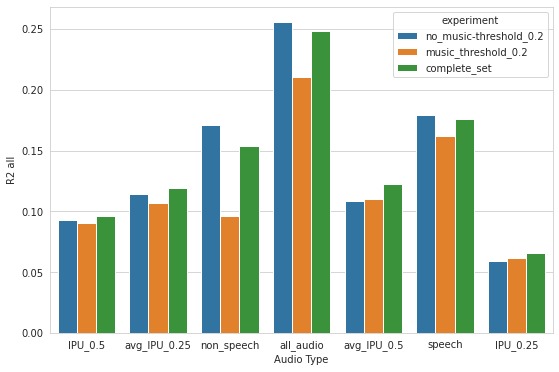

In [112]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="all", hue="experiment", data=r2_all,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R2 all')

### Openness

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'R2 Openness')]

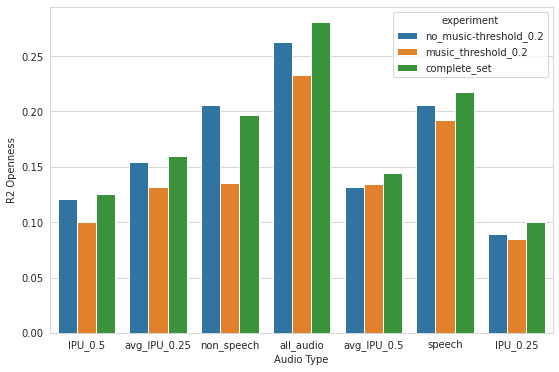

In [113]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="O", hue="experiment", data=r2_O,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R2 Openness')

### Conscienciousness

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'R2 Conscienciousness')]

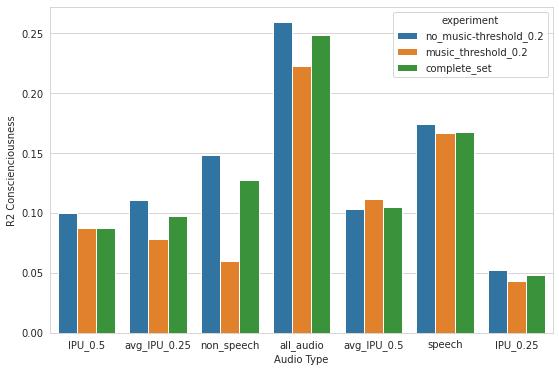

In [114]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="C", hue="experiment", data=r2_C,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R2 Conscienciousness')

### Extraversion

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'R2 Extraversion')]

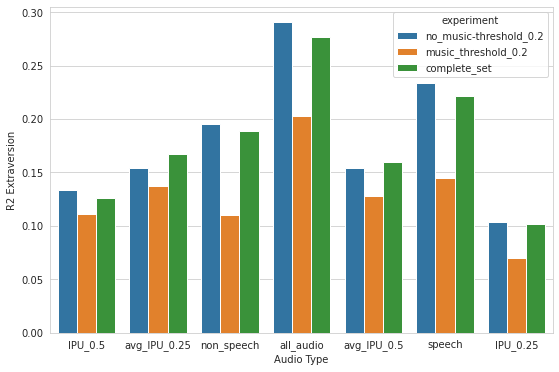

In [115]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="E", hue="experiment", data=r2_E,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R2 Extraversion')

### Agreeableness

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'R2 Agreeableness')]

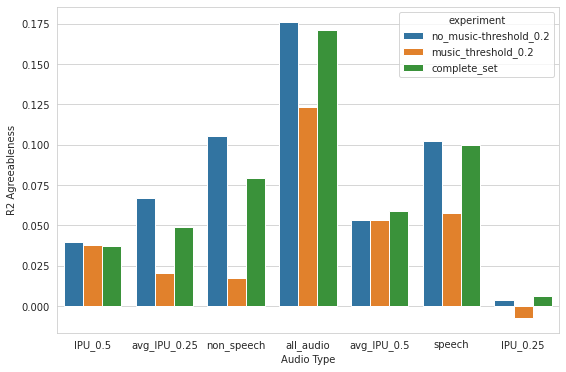

In [116]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="A", hue="experiment", data=r2_A,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R2 Agreeableness')

### Neuroticism

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'R2 Neuroticism')]

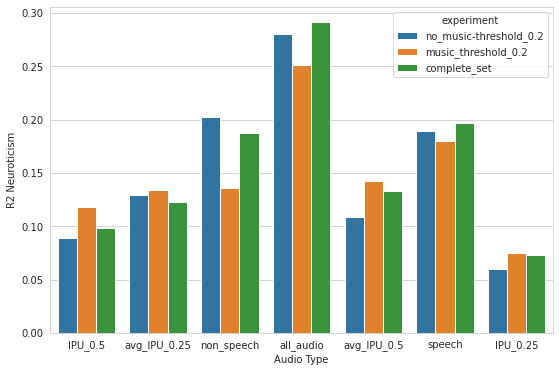

In [117]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="N", hue="experiment", data=r2_N,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R2 Neuroticism')

## R

In [120]:
r=DF_performance[DF_performance['index']=='r'].drop(columns='index')
r=r[r['experiment'] !='all_audio_no_music_threshold_0.5']
r['experiment']=r['experiment'].apply(lambda x: experiment_dict[x])

r_all=r.loc[:,~r.columns.isin(['O','C','E','A','N'])]
r_O=r.loc[:,~r.columns.isin(['all','C','E','A','N'])]
r_C=r.loc[:,~r.columns.isin(['O','all','E','A','N'])]
r_E=r.loc[:,~r.columns.isin(['O','C','all','A','N'])]
r_A=r.loc[:,~r.columns.isin(['O','C','E','all','N'])]
r_N=r.loc[:,~r.columns.isin(['O','C','E','A','all'])]

### All

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'R all')]

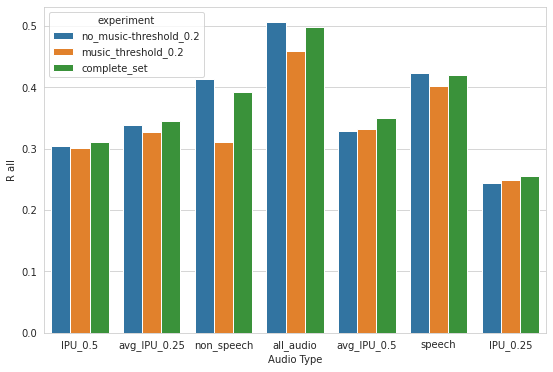

In [122]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="all", hue="experiment", data=r_all,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R all')

### Openness

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'R Openness')]

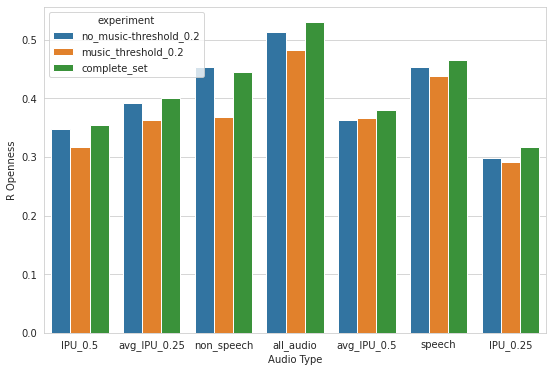

In [123]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="O", hue="experiment", data=r_O,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R Openness')

### Conscienciousness

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'R Conscienciousness')]

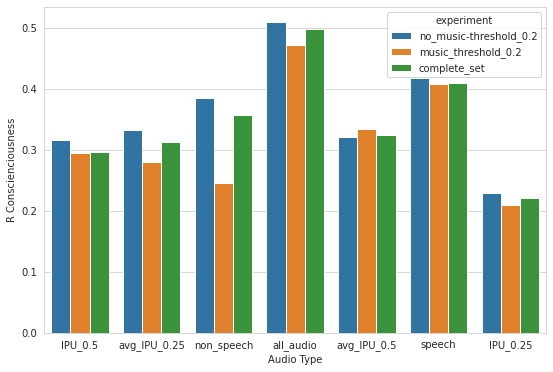

In [124]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="C", hue="experiment", data=r_C,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R Conscienciousness')

### Extraversion

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'R Extraversion')]

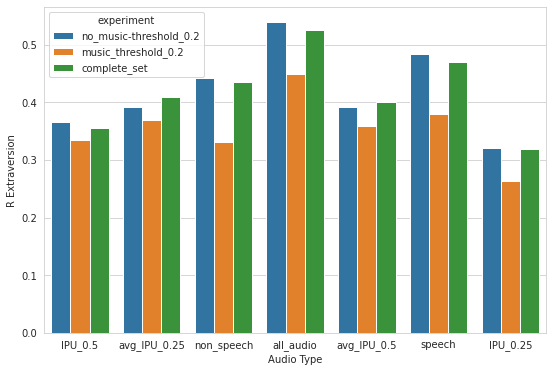

In [125]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="E", hue="experiment", data=r_E,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R Extraversion')

### Agreeableness

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'R Agreableness')]

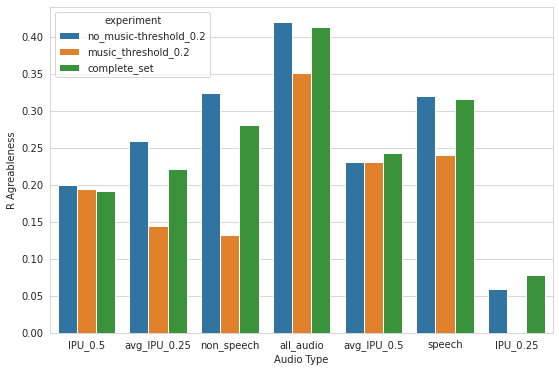

In [126]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="A", hue="experiment", data=r_A,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R Agreableness')

### Neuroticism

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'R Neuroticism')]

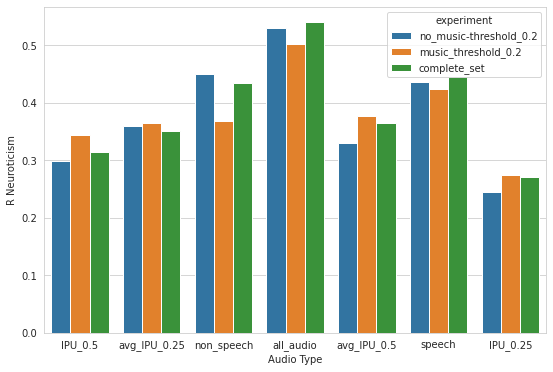

In [127]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="N", hue="experiment", data=r_N,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R Neuroticism')

## RMSE

In [128]:
RMSE=DF_performance[DF_performance['index']=='RMSE'].drop(columns='index')
RMSE=RMSE[RMSE['experiment'] !='all_audio_no_music_threshold_0.5']
RMSE['experiment']=RMSE['experiment'].apply(lambda x: experiment_dict[x])

RMSE_all=RMSE.loc[:,~RMSE.columns.isin(['O','C','E','A','N'])]
RMSE_O=RMSE.loc[:,~RMSE.columns.isin(['all','C','E','A','N'])]
RMSE_C=RMSE.loc[:,~RMSE.columns.isin(['O','all','E','A','N'])]
RMSE_E=RMSE.loc[:,~RMSE.columns.isin(['O','C','all','A','N'])]
RMSE_A=RMSE.loc[:,~RMSE.columns.isin(['O','C','E','all','N'])]
RMSE_N=RMSE.loc[:,~RMSE.columns.isin(['O','C','E','A','all'])]

### All

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'RMSE all')]

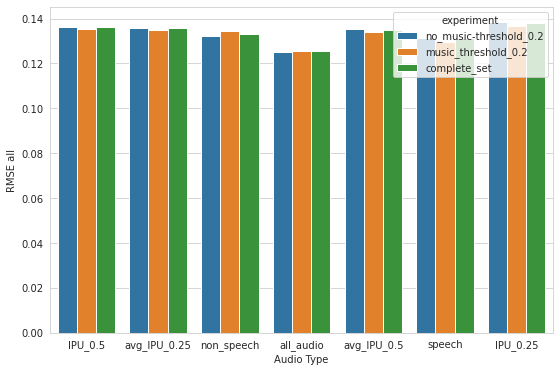

In [129]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="all", hue="experiment", data=RMSE_all,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='RMSE all')

### Openness

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'RMSE O')]

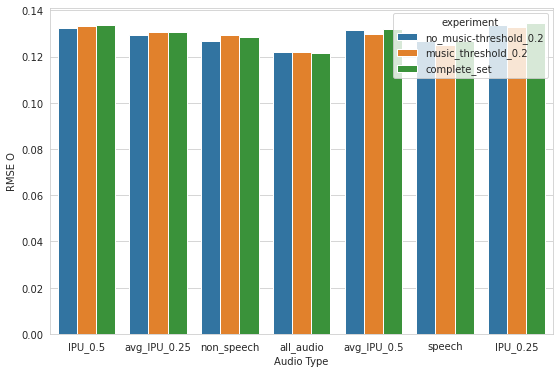

In [132]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="O", hue="experiment", data=RMSE_O,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='RMSE O')

### Consciencousness

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'RMSE C')]

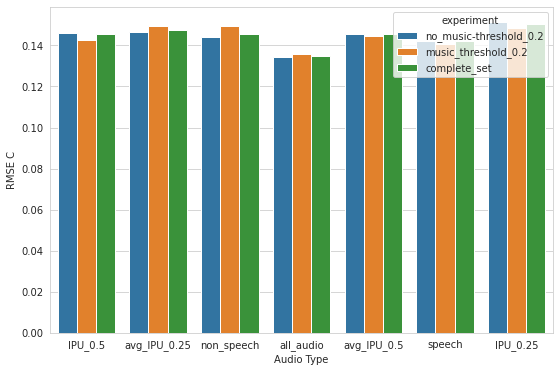

In [133]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="C", hue="experiment", data=RMSE_C,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='RMSE C')

### Extraversion

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'RMSE E')]

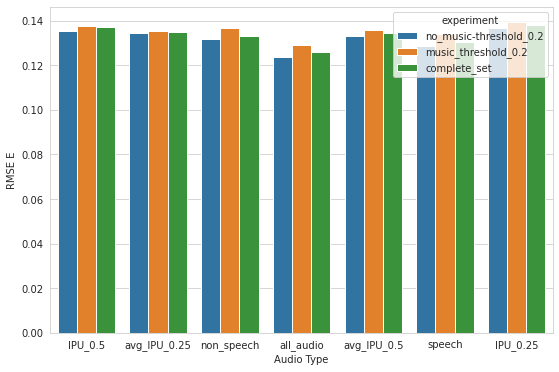

In [134]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="E", hue="experiment", data=RMSE_E,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='RMSE E')

### Agreeableness

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'RMSE A')]

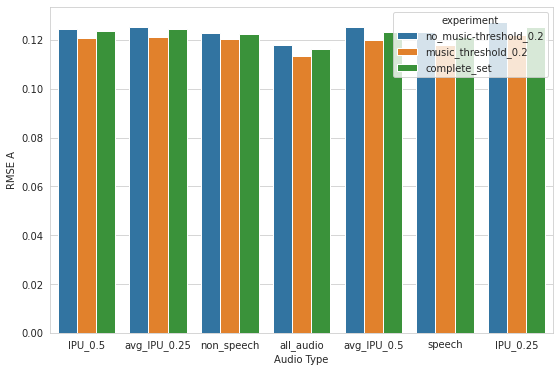

In [135]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="A", hue="experiment", data=RMSE_A,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='RMSE A')

### Neuroticism

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'RMSE N')]

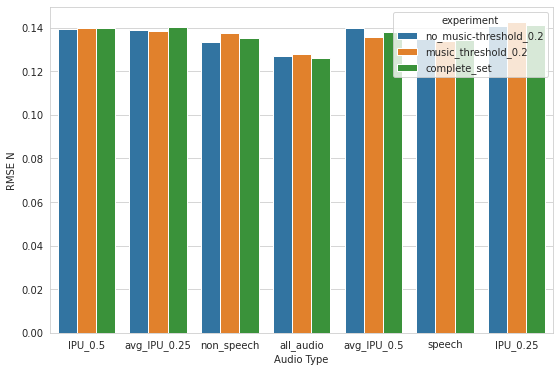

In [136]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="N", hue="experiment", data=RMSE_N,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='RMSE N')

## MAE

In [137]:
MAE=DF_performance[DF_performance['index']=='MAE'].drop(columns='index')
MAE=MAE[MAE['experiment'] !='all_audio_no_music_threshold_0.5']
MAE['experiment']=MAE['experiment'].apply(lambda x: experiment_dict[x])

MAE_all=MAE.loc[:,~MAE.columns.isin(['O','C','E','A','N'])]
MAE_O=MAE.loc[:,~MAE.columns.isin(['all','C','E','A','N'])]
MAE_C=MAE.loc[:,~MAE.columns.isin(['O','all','E','A','N'])]
MAE_E=MAE.loc[:,~MAE.columns.isin(['O','C','all','A','N'])]
MAE_A=MAE.loc[:,~MAE.columns.isin(['O','C','E','all','N'])]
MAE_N=MAE.loc[:,~MAE.columns.isin(['O','C','E','A','all'])]

### All

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'MAE all')]

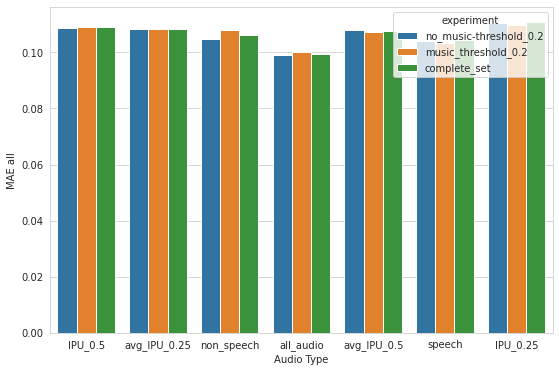

In [138]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="all", hue="experiment", data=MAE_all,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MAE all')

### Openness

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'MAE O')]

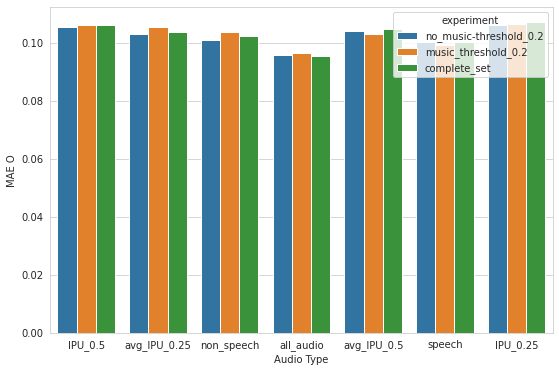

In [139]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="O", hue="experiment", data=MAE_O,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MAE O')

### Conscienciousness

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'MAE C')]

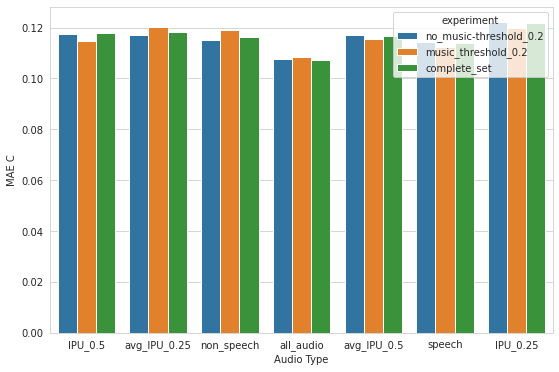

In [141]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="C", hue="experiment", data=MAE_C,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MAE C')

### Extraversion

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'MAE_E')]

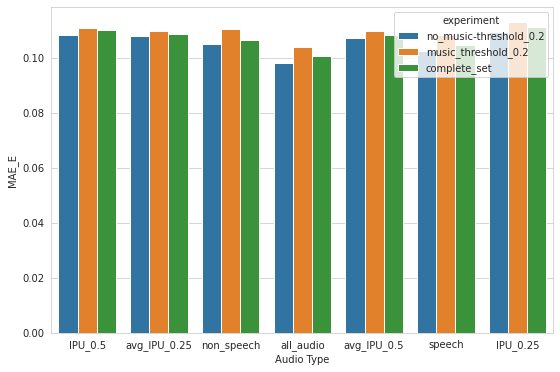

In [142]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="E", hue="experiment", data=MAE_E,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MAE_E')

### Agreeableness

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'MAE A')]

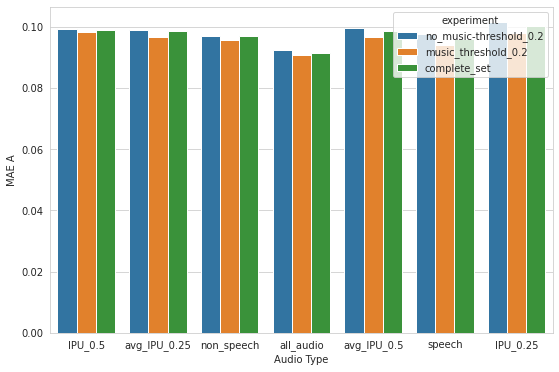

In [143]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="A", hue="experiment", data=MAE_A,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MAE A')

### Neuroticism

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'MAE N')]

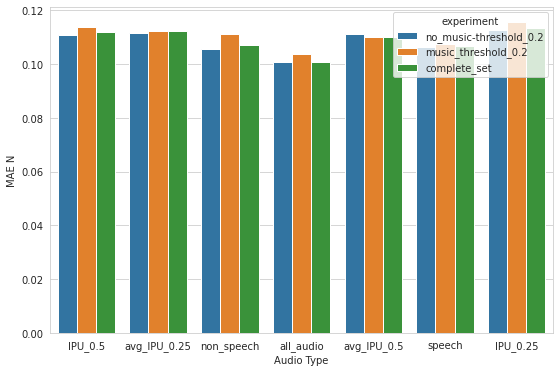

In [145]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="N", hue="experiment", data=MAE_N,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MAE N')

## MSE

In [154]:
MSE=DF_performance[DF_performance['index']=='MSE'].drop(columns='index')
MSE=MSE[MSE['experiment'] !='all_audio_no_music_threshold_0.5']
MSE['experiment']=MSE['experiment'].apply(lambda x: experiment_dict[x])

MSE_all=MSE.loc[:,~MSE.columns.isin(['O','C','E','A','N'])]
MSE_O=MSE.loc[:,~MSE.columns.isin(['all','C','E','A','N'])]
MSE_C=MSE.loc[:,~MSE.columns.isin(['O','all','E','A','N'])]
MSE_E=MSE.loc[:,~MSE.columns.isin(['O','C','all','A','N'])]
MSE_A=MSE.loc[:,~MSE.columns.isin(['O','C','E','all','N'])]
MSE_N=MSE.loc[:,~MSE.columns.isin(['O','C','E','A','all'])]

### All

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'MSE all')]

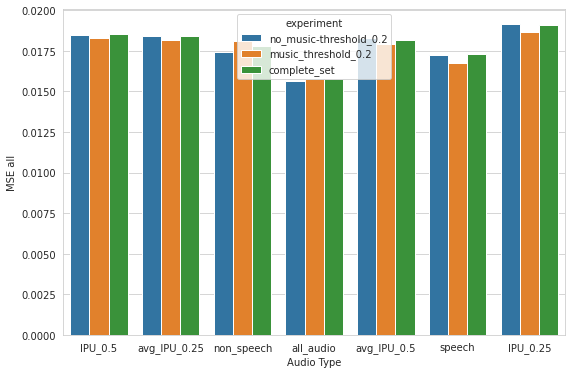

In [155]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="all", hue="experiment", data=MSE_all,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MSE all')

### Openness

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'MSE O')]

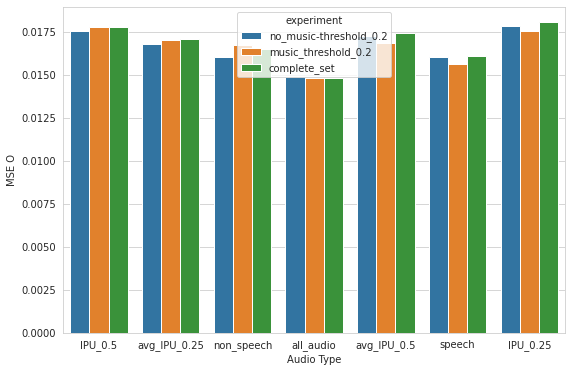

In [156]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="O", hue="experiment", data=MSE_O,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MSE O')

### Conscienciousness

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'MSE C')]

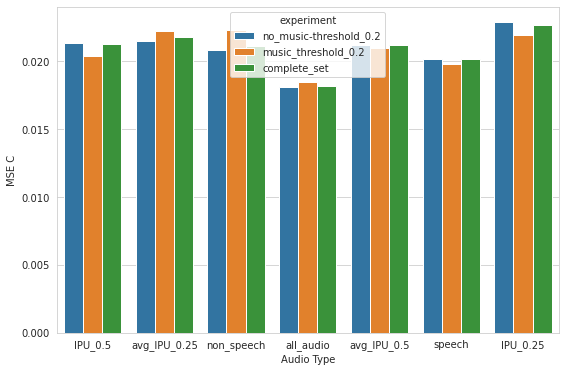

In [157]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="C", hue="experiment", data=MSE_C,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MSE C')

### Extraversion

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'MSE_E')]

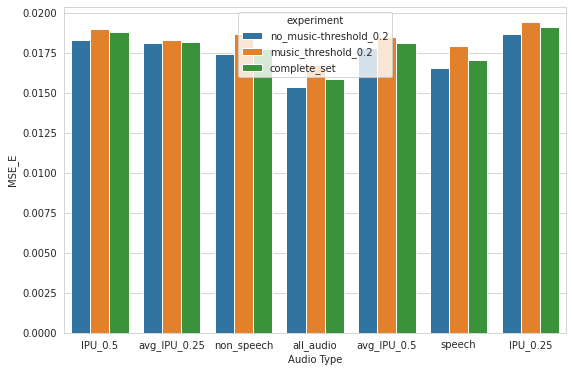

In [158]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="E", hue="experiment", data=MSE_E,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MSE_E')

### Agreeableness

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'MSE A')]

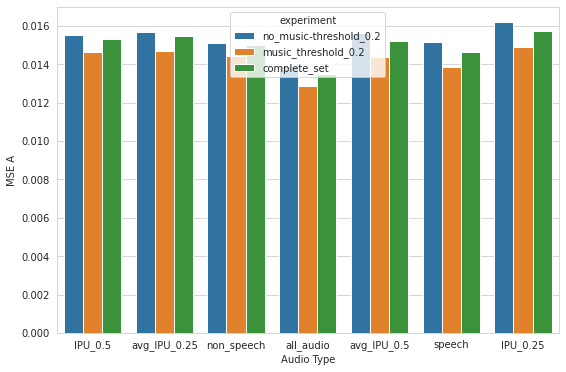

In [159]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="A", hue="experiment", data=MSE_A,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MSE A')

### Neuroticism

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'MSE N')]

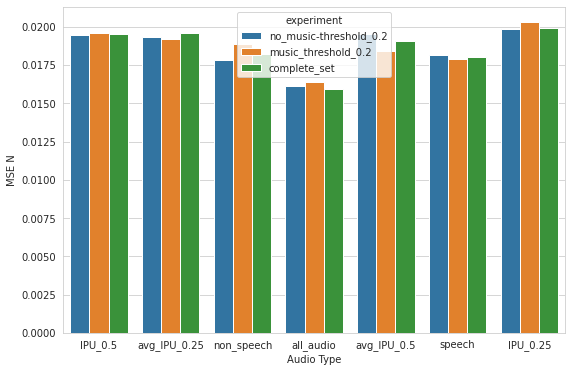

In [160]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="N", hue="experiment", data=MSE_N,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MSE N')

# Relevant features

In [185]:
DF_relevant_features

,Unnamed: 0,features,Personality,Importance,audio_type,experiment
0,3,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,O,0.049996,IPU_0.5,all_audio_no_music_threshold_0.2
1,16,loudness_sma3_meanRisingSlope,O,0.060312,IPU_0.5,all_audio_no_music_threshold_0.2
2,17,loudness_sma3_stddevRisingSlope,O,0.017655,IPU_0.5,all_audio_no_music_threshold_0.2
3,54,F3bandwidth_sma3nz_amean,O,0.017881,IPU_0.5,all_audio_no_music_threshold_0.2
4,104,loudness_sma3_meanRisingSlope,C,0.038530,IPU_0.5,all_audio_no_music_threshold_0.2
...,...,...,...,...,...,...
18,284,loudness_sma3_stddevRisingSlope,A,0.035569,IPU_0.25,all_audio_complete_set
19,356,F0semitoneFrom27.5Hz_sma3nz_amean,N,0.070983,IPU_0.25,all_audio_complete_set
20,361,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,N,0.017676,IPU_0.25,all_audio_complete_set
21,371,loudness_sma3_pctlrange0-2,N,0.021972,IPU_0.25,all_audio_complete_set


In [196]:
DF_O=DF_relevant_features[DF_relevant_features['Personality']=='O']
DF_C=DF_relevant_features[DF_relevant_features['Personality']=='C']
DF_E=DF_relevant_features[DF_relevant_features['Personality']=='E']
DF_A=DF_relevant_features[DF_relevant_features['Personality']=='A']
DF_N=DF_relevant_features[DF_relevant_features['Personality']=='N']

List of top ten features in every experiment, for each personality trait

In [ ]:
features_O=DF_O.drop_duplicates('features').features.values
features_C=DF_C.drop_duplicates('features').features.values
features_E=DF_E.drop_duplicates('features').features.values
features_A=DF_A.drop_duplicates('features').features.values
features_N=DF_N.drop_duplicates('features').features.values

Feature count 

In [229]:
DF_features_O=pd.DataFrame(columns=['O'])
DF_features_C=pd.DataFrame(columns=['C'])
DF_features_E=pd.DataFrame(columns=['E'])
DF_features_A=pd.DataFrame(columns=['A'])
DF_features_N=pd.DataFrame(columns=['N'])

for (f_O,f_C,f_E,f_A,f_N) in zip(features_O,features_C,features_E,features_A,features_N):
    DF_features_O.loc[f_O]=DF_O[DF_O['features']==f_O].shape[0]
    DF_features_C.loc[f_C]=DF_C[DF_C['features']==f_C].shape[0]
    DF_features_E.loc[f_E]=DF_E[DF_E['features']==f_E].shape[0]
    DF_features_A.loc[f_A]=DF_A[DF_A['features']==f_A].shape[0]
    DF_features_N.loc[f_N]=DF_N[DF_N['features']==f_N].shape[0]

DF_features_O=DF_features_O.sort_values(by='O',ascending=False).reset_index()
DF_features_C=DF_features_C.sort_values(by='C',ascending=False).reset_index()
DF_features_E=DF_features_E.sort_values(by='E',ascending=False).reset_index()
DF_features_A=DF_features_A.sort_values(by='A',ascending=False).reset_index()
DF_features_N=DF_features_N.sort_values(by='N',ascending=False).reset_index()

In [237]:
from functools import reduce 

OCEAN=[DF_features_O,DF_features_C,DF_features_E,DF_features_A,DF_features_N]

features_freq_DF = reduce(lambda left, right:
                     pd.merge(left , right,
                              on = ['index'],
                              how='outer'),
                     OCEAN)

Feature count for every relevant features and personality traits 

In [238]:
features_freq_DF

,index,O,C,E,A,N
0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,16.0,NaN,19.0,NaN,2.0
1,loudness_sma3_meanRisingSlope,12.0,7.0,13.0,16.0,17.0
2,loudness_sma3_stddevRisingSlope,12.0,11.0,8.0,11.0,9.0
3,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,10.0,NaN,11.0,NaN,NaN
4,loudness_sma3_percentile20.0,8.0,NaN,7.0,2.0,6.0
5,loudness_sma3_meanFallingSlope,5.0,NaN,3.0,6.0,8.0
6,StddevVoicedSegmentLengthSec,4.0,5.0,2.0,6.0,9.0
7,loudnessPeaksPerSec,3.0,9.0,1.0,9.0,10.0
8,mfcc1V_sma3nz_amean,2.0,NaN,NaN,NaN,NaN
9,loudness_sma3_pctlrange0-2,2.0,NaN,2.0,2.0,4.0


Relevant features in every personality trait 

In [240]:
features_freq_DF.dropna()

,index,O,C,E,A,N
1,loudness_sma3_meanRisingSlope,12.0,7.0,13.0,16.0,17.0
2,loudness_sma3_stddevRisingSlope,12.0,11.0,8.0,11.0,9.0
6,StddevVoicedSegmentLengthSec,4.0,5.0,2.0,6.0,9.0
7,loudnessPeaksPerSec,3.0,9.0,1.0,9.0,10.0
